<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://pythonquants.com' target='_blank'>www.pythonquants.com</a>

**Contact us** | <a href='mailto:analytics@pythonquants.com'>analytics@pythonquants.com</a>

## Principal Component Analysis

In [1]:
import numpy as np
import pandas as pd
import pandas.io.data as web
from sklearn.decomposition import KernelPCA

### DAX Index and its 30 Stocks

In [2]:
symbols = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE',
           'BMW.DE', 'CBK.DE', 'CON.DE', 'DAI.DE', 'DB1.DE',
           'DBK.DE', 'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE',
           'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE',
           'LIN.DE', 'LXS.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE',
           'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE',
           '^GDAXI']

In [3]:
%%time
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo')['Close']
data = data.dropna()

CPU times: user 208 ms, sys: 18 ms, total: 226 ms
Wall time: 4.04 s


In [4]:
dax = pd.DataFrame(data.pop('^GDAXI'))

In [5]:
data[data.columns[:6]].head()

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE
Date,,,,,,
2010-01-04,38.505,88.54,44.850,56.40,46.445,32.050
2010-01-05,39.720,88.81,44.170,55.37,46.200,32.310
2010-01-06,39.400,89.50,44.450,55.02,46.165,32.810
2010-01-07,39.745,88.47,44.155,54.30,45.700,33.100
2010-01-08,39.600,87.99,44.020,53.82,44.380,32.655


### Applying PCA

In [6]:
scale_function = lambda x: (x - x.mean()) / x.std()

In [7]:
pca = KernelPCA().fit(data.apply(scale_function))

In [8]:
len(pca.lambdas_)

684

In [9]:
pca.lambdas_[:10].round()

array([ 27664.,   6169.,   3244.,   2429.,   1058.,    549.,    321.,
          274.,    176.,    149.])

In [10]:
get_we = lambda x: x / x.sum()

In [11]:
get_we(pca.lambdas_)[:10]

array([ 0.64756879,  0.14441618,  0.07593786,  0.05686985,  0.02476258,
        0.01285501,  0.00751753,  0.00642144,  0.00413127,  0.00348122])

In [12]:
get_we(pca.lambdas_)[:5].sum()

0.94955526112229649

### Constructing a PCA Index

In [13]:
pca = KernelPCA(n_components=1).fit(data.apply(scale_function))
dax['PCA_1'] = pca.transform(-data)

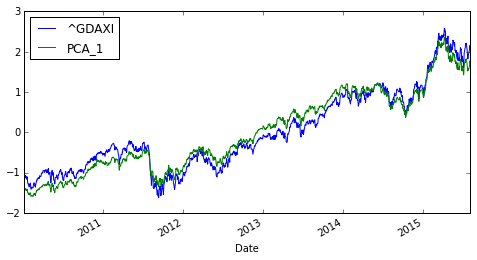

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
dax.apply(scale_function).plot(figsize=(8, 4))
# tag: pca_1
# title: German DAX index and PCA index with 1 component

In [15]:
pca = KernelPCA(n_components=5).fit(data.apply(scale_function))
pca_components = pca.transform(-data)
weights = get_we(pca.lambdas_)
dax['PCA_5'] = np.dot(pca_components, weights)

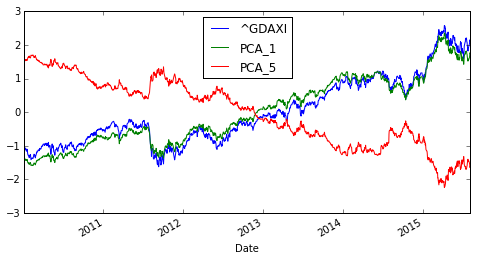

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
dax.apply(scale_function).plot(figsize=(8, 4))
# tag: pca_2
# title: German DAX index and PCA indices with 1 and 5 components

In [17]:
import matplotlib as mpl
mpl_dates = mpl.dates.date2num(data.index.to_pydatetime())
mpl_dates

array([ 733776.,  733777.,  733778., ...,  735815.,  735816.,  735817.])

<matplotlib.colorbar.Colorbar instance at 0x7f313531a7e8>

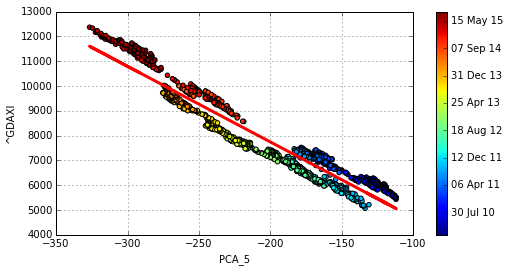

In [18]:
plt.figure(figsize=(8, 4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates)
lin_reg = np.polyval(np.polyfit(dax['PCA_5'],
                                dax['^GDAXI'], 1),
                                dax['PCA_5'])
plt.plot(dax['PCA_5'], lin_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
                format=mpl.dates.DateFormatter('%d %b %y'))
# tag: pca_3
# title: DAX return values against PCA return values with linear regression

In [19]:
cut_date = '2011/7/1'
early_pca = dax[dax.index < cut_date]['PCA_5']
early_reg = np.polyval(np.polyfit(early_pca,
                dax['^GDAXI'][dax.index < cut_date], 1),
                early_pca)

In [20]:
late_pca = dax[dax.index >= cut_date]['PCA_5']
late_reg = np.polyval(np.polyfit(late_pca,
                dax['^GDAXI'][dax.index >= cut_date], 1),
                late_pca)

<matplotlib.colorbar.Colorbar instance at 0x7f31351987e8>

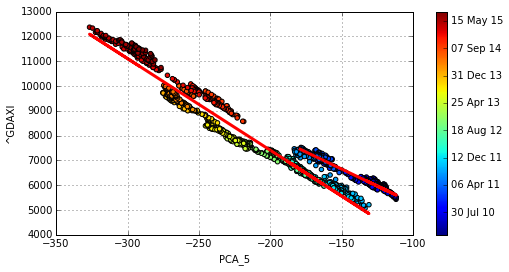

In [21]:
plt.figure(figsize=(8, 4))
plt.scatter(dax['PCA_5'], dax['^GDAXI'], c=mpl_dates)
plt.plot(early_pca, early_reg, 'r', lw=3)
plt.plot(late_pca, late_reg, 'r', lw=3)
plt.grid(True)
plt.xlabel('PCA_5')
plt.ylabel('^GDAXI')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
                format=mpl.dates.DateFormatter('%d %b %y'))
# tag: pca_7
# title: DAX index values against PCA index values with early and late regression (regime switch)

## Bayesian Regression

### Bayes' Formula

### PyMC3

In [22]:
import warnings
warnings.simplefilter('ignore')
import pymc as pm
import numpy as np
np.random.seed(1000)
import matplotlib.pyplot as plt
%matplotlib inline

### Introductory Example

In [23]:
x = np.linspace(0, 10, 500)
y = 4 + 2 * x + np.random.standard_normal(len(x)) * 2

In [24]:
reg = np.polyfit(x, y, 1)
  # linear regression

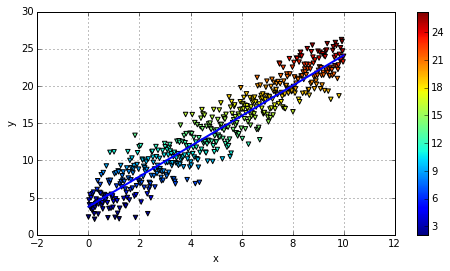

In [25]:
plt.figure(figsize=(8, 4))
plt.scatter(x, y, c=y, marker='v')
plt.plot(x, reg[1] + reg[0] * x, lw=2.0)
plt.colorbar()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
# tag: pm_fig_0
# title: Sample data points a regresion line
# size: 90

In [26]:
reg

array([ 2.03384161,  3.77649234])

In [27]:
with pm.Model() as model: 
        # model specifications in PyMC3
        # are wrapped in a with-statement
    # define priors
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta = pm.Normal('beta', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    
    # define linear regression
    y_est = alpha + beta * x
    
    # define likelihood
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)
    
    # inference
    start = pm.find_MAP()
      # find starting value by optimization
    step = pm.NUTS(state=start)
      # instantiate MCMC sampling algorithm
    trace = pm.sample(100, step, start=start, progressbar=False)
      # draw 100 posterior samples using NUTS sampling

In [28]:
trace[0]

{'alpha': 3.8518992309241935,
 'beta': 2.0310991967010361,
 'sigma': 2.0673693565880482}

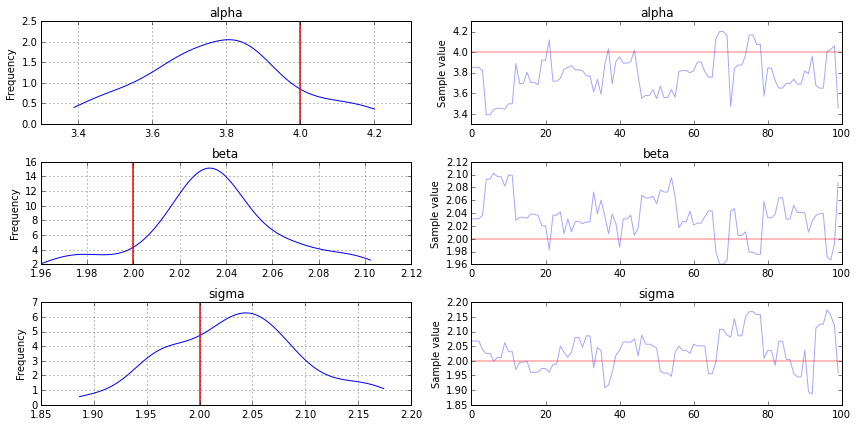

In [29]:
fig = pm.traceplot(trace, lines={'alpha': 4, 'beta': 2, 'sigma': 2})
plt.figure(figsize=(8, 8))
# tag: pm_fig_1
# title: Trace plots for alpha, beta and sigma
# size: 90

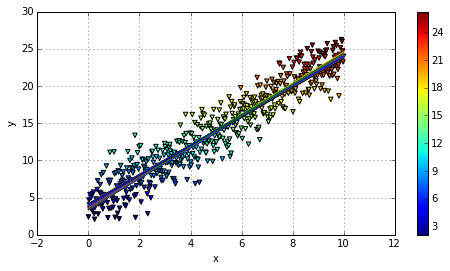

In [30]:
plt.figure(figsize=(8, 4))
plt.scatter(x, y, c=y, marker='v')
plt.colorbar()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
for i in range(len(trace)):
    plt.plot(x, trace['alpha'][i] + trace['beta'][i] * x)
# tag: pm_fig_2
# title: Sample data and regression lines from Bayesian regression
# size: 90

### Real Data

In [31]:
import warnings
warnings.simplefilter('ignore')
import zipline
import pytz
import datetime as dt

In [32]:
data = zipline.data.load_from_yahoo(stocks=['GLD', 'GDX'], 
         end=dt.datetime(2014, 3, 15, 0, 0, 0, 0, pytz.utc)).dropna()
data.info()

GLD
GDX
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1967 entries, 2006-05-22 to 2014-03-14
Data columns (total 2 columns):
GDX    1967 non-null float64
GLD    1967 non-null float64
dtypes: float64(2)
memory usage: 46.1 KB


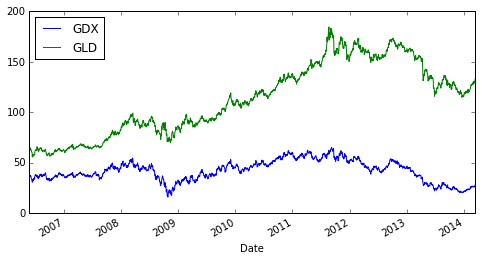

In [33]:
data.plot(figsize=(8, 4))
# tag: zip_fig_1
# title: Co-movements of traiding pair
# size: 90

In [34]:
data.ix[-1] / data.ix[0] - 1

GDX   -0.216002
GLD    1.038285
dtype: float64

In [35]:
data.corr()

,GDX,GLD
GDX,1.000000,0.466962
GLD,0.466962,1.000000


In [36]:
data.index

DatetimeIndex(['2006-05-22', '2006-05-23', '2006-05-24', '2006-05-25',
               '2006-05-26', '2006-05-30', '2006-05-31', '2006-06-01',
               '2006-06-02', '2006-06-05', 
               ...
               '2014-03-03', '2014-03-04', '2014-03-05', '2014-03-06',
               '2014-03-07', '2014-03-10', '2014-03-11', '2014-03-12',
               '2014-03-13', '2014-03-14'],
              dtype='datetime64[ns]', name=u'Date', length=1967, freq=None, tz='UTC')

In [37]:
import matplotlib as mpl
mpl_dates = mpl.dates.date2num(data.index.to_pydatetime())
mpl_dates

array([ 732453.,  732454.,  732455., ...,  735304.,  735305.,  735306.])

<matplotlib.colorbar.Colorbar instance at 0x7f311d1316c8>

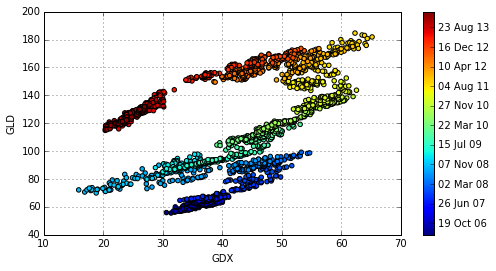

In [38]:
plt.figure(figsize=(8, 4))
plt.scatter(data['GDX'], data['GLD'], c=mpl_dates, marker='o')
plt.grid(True)
plt.xlabel('GDX')
plt.ylabel('GLD')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
             format=mpl.dates.DateFormatter('%d %b %y'))
# tag: zip_fig_2
# title: Scatter plot of prices for GLD and GDX
# size: 90

In [39]:
with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta = pm.Normal('beta', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    
    y_est = alpha + beta * data['GDX'].values
    
    likelihood = pm.Normal('GLD', mu=y_est, sd=sigma,
                           observed=data['GLD'].values)
    
    start = pm.find_MAP()
    step = pm.NUTS(state=start)
    trace = pm.sample(100, step, start=start, progressbar=False)

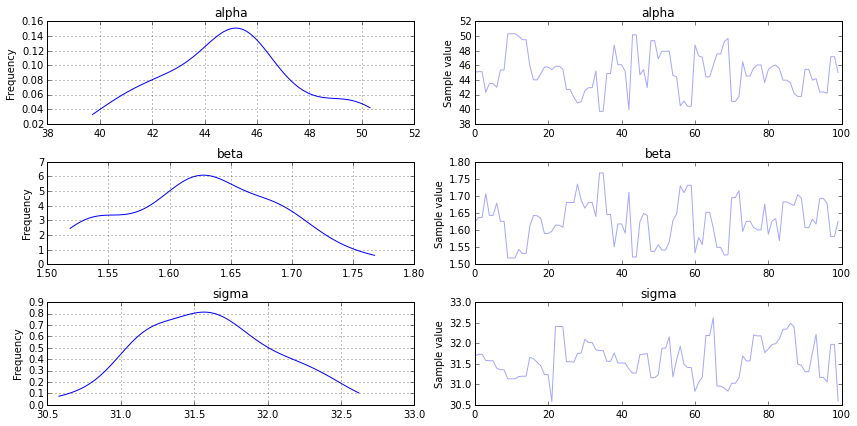

In [40]:
fig = pm.traceplot(trace)
plt.figure(figsize=(8, 8))
# tag: zip_fig_3
# title: Trace plots for alpha, beta and sigma based on GDX and GLD data
# size: 90

<matplotlib.colorbar.Colorbar instance at 0x7f311727b3b0>

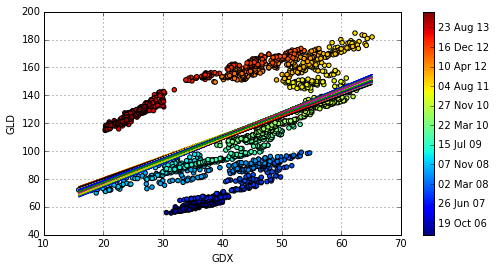

In [41]:
plt.figure(figsize=(8, 4))
plt.scatter(data['GDX'], data['GLD'], c=mpl_dates, marker='o')
plt.grid(True)
plt.xlabel('GDX')
plt.ylabel('GLD')
for i in range(len(trace)):
    plt.plot(data['GDX'], trace['alpha'][i] + trace['beta'][i] * data['GDX'])
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
             format=mpl.dates.DateFormatter('%d %b %y'))
# tag: zip_fig_4
# title: Scatter plot with "simple" regression lines
# size: 90

In [42]:
model_randomwalk = pm.Model()
with model_randomwalk:
    # std of random walk best sampled in log space
    sigma_alpha, log_sigma_alpha = \
            model_randomwalk.TransformedVar('sigma_alpha', 
                            pm.Exponential.dist(1. / .02, testval=.1), 
                            pm.logtransform)
    sigma_beta, log_sigma_beta = \
            model_randomwalk.TransformedVar('sigma_beta', 
                            pm.Exponential.dist(1. / .02, testval=.1),
                            pm.logtransform)

In [43]:
from pymc.distributions.timeseries import GaussianRandomWalk
# to make the model more simple, we will apply the same coefficients
# to 50 data points at a time
subsample_alpha = 50
subsample_beta = 50

with model_randomwalk:
    alpha = GaussianRandomWalk('alpha', sigma_alpha**-2, 
                               shape=len(data) / subsample_alpha)
    beta = GaussianRandomWalk('beta', sigma_beta**-2, 
                              shape=len(data) / subsample_beta)
    
    # make coefficients have the same length as prices
    alpha_r = np.repeat(alpha, subsample_alpha)
    beta_r = np.repeat(beta, subsample_beta)

In [44]:
len(data.dropna().GDX.values)  # a bit longer than 1,950

1967

In [45]:
with model_randomwalk:
    # define regression
    regression = alpha_r + beta_r * data.GDX.values[:1950]
    
    # assume prices are normally distributed,
    # the mean comes from the regression
    sd = pm.Uniform('sd', 0, 20)
    likelihood = pm.Normal('GLD', 
                           mu=regression, 
                           sd=sd, 
                           observed=data.GLD.values[:1950])

In [46]:
import scipy.optimize as sco
with model_randomwalk:
    # first optimize random walk
    start = pm.find_MAP(vars=[alpha, beta], fmin=sco.fmin_l_bfgs_b)
    
    # sampling
    step = pm.NUTS(scaling=start)
    trace_rw = pm.sample(100, step, start=start, progressbar=False)

In [47]:
np.shape(trace_rw['alpha'])

(100, 39)

In [48]:
part_dates = np.linspace(min(mpl_dates), max(mpl_dates), 39)

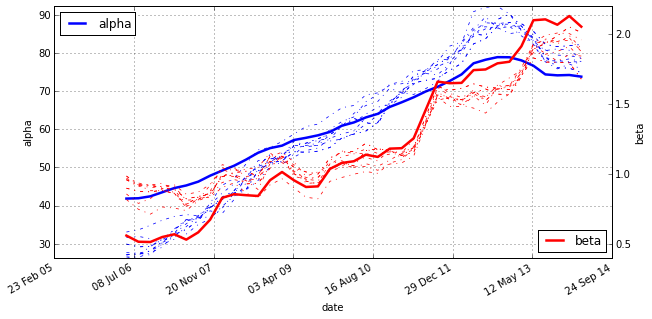

In [49]:
fig, ax1 = plt.subplots(figsize=(10, 5))
plt.plot(part_dates, np.mean(trace_rw['alpha'], axis=0),
         'b', lw=2.5, label='alpha')
for i in range(45, 55):
    plt.plot(part_dates, trace_rw['alpha'][i], 'b-.', lw=0.75)
plt.xlabel('date')
plt.ylabel('alpha')
plt.axis('tight')
plt.grid(True)
plt.legend(loc=2)
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('%d %b %y') )
ax2 = ax1.twinx()
plt.plot(part_dates, np.mean(trace_rw['beta'], axis=0),
         'r', lw=2.5, label='beta')
for i in range(45, 55):
    plt.plot(part_dates, trace_rw['beta'][i], 'r-.', lw=0.75)
plt.ylabel('beta')
plt.legend(loc=4)
fig.autofmt_xdate()
# tag: zip_fig_5
# title: Evolution of (mean) alpha and (mean) beta over time (updated estimates over time)
# size: 90

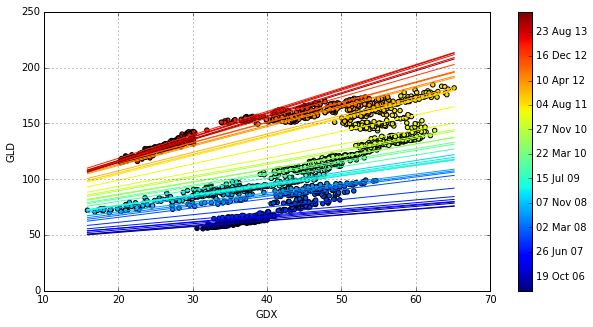

In [50]:
plt.figure(figsize=(10, 5))
plt.scatter(data['GDX'], data['GLD'], c=mpl_dates, marker='o')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250),
             format=mpl.dates.DateFormatter('%d %b %y'))
plt.grid(True)
plt.xlabel('GDX')
plt.ylabel('GLD')
x = np.linspace(min(data['GDX']), max(data['GDX'])) 
for i in range(39):
    alpha_rw = np.mean(trace_rw['alpha'].T[i])
    beta_rw = np.mean(trace_rw['beta'].T[i]) 
    plt.plot(x, alpha_rw + beta_rw * x, color=plt.cm.jet(256 * i / 39))
# tag: zip_fig_6
# title: Scatter plot with time-dependent regression lines (updated estimates)
# size: 90

## Conclusions

## Further Reading

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://www.pythonquants.com" target="_blank">www.pythonquants.com</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a>

<a href="mailto:analytics@pythonquants.com">analytics@pythonquants.com</a>

**Python Quant Platform** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**Derivatives Analytics with Python** |
<a href="http://www.derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Python for Finance** |
<a href="http://shop.oreilly.com/product/0636920032441.do" target="_blank">Python for Finance @ O'Reilly</a>